In [1]:
options(repr.plot.width=4, repr.plot.height=4) #Something to help adjust the shape of the plot

# Lab 6 Preperation

Lessons to be learned: 

* Point Estimates
* Statstics aka random variables
* Sample Variance
* For Loops

# Point Estimator Theory
A point estimate is a combination of sample measurments (acting like a function of the sample) that spits out values that are close to the paramter it wants to estimate. As an example:

The samples means $\hat{\theta}$'s are used to estimate the parameter of population mean $\theta$ by using the mean function $E(\hat{\theta})$ 

Essentially, we are using the statstics (represented by random variables $X_1, X_2...X_n$) to estimate the parameter, the paramter being a *fixed unknown constant*. So far so good right? 

We assume that the stastics are independent, and that they are unbiased. Unbiased here means the result of that function should be close to the paramter on average. 


# Sample Variance
We know from class that $\bar{X}$ (the means of each of the sample means, AKA mean of means) is a very good point estimator for the population mean $\mu$. But is this true for the sample variance $s^2$ and the population variance $\sigma^2$?

Recall that: 

$$
s^2 = \frac{1}{n-1} \sum^{n}_{i=1} (X_i - \bar{X})^2
$$

We'll use R and this formula to test if this is a good esitmator.

By the way, it is a good estimator (we proved it in class its in my OneNote right now) but we have to do something for the lab soooooo....

# For Loops
Python I miss you... You already know about for loops, I used them all the time in python for christs sake. Here is the syntax for those kind of loops in R: 

```
for("variable" in "list"){
do something
}
```

As an example if I wanted to multiply every number between 1 and 10 times 3 I could: 

In [2]:
nums = c(1:10)

for (i in nums){
    print(i*3)
}

[1] 3
[1] 6
[1] 9
[1] 12
[1] 15
[1] 18
[1] 21
[1] 24
[1] 27
[1] 30


Of course we have more practical uses for these. Say we wanted to go through every single number in a $5x4$ matrix, like the one I'm making below:

In [3]:
x = matrix( 1:20, nrow = 5, ncol = 4 ) 
x

1,6,11,16
2,7,12,17
3,8,13,18
4,9,14,19
5,10,15,20


How would I find the sum of the entire dataset? That is, what is $1+6+11+16+2...+20$? Let's use a for loop:

In [4]:
sums = 0
for(i in x){
    sums = sums+i
}
sums == sum(c(1:20)) #So it works!

[1] TRUE

# Excercise
The "Hardness" of a metal is measured with some stupid number called the rockwell hardness scale. For a certain metal, it has it's hardness vary normally with a mean of $105$ and a standard deviation of $12$. You have a sample of this metal, and want to see if the sample variance of this metal matches the known population variance of $12^2$.

Draw 100 samples of size 10 from that normal distribution and find the sample variance of each sample using a for loop.

In [11]:
dim(samples)

[1] 1000   10

In [5]:
m = 10 * 100
n = 10
mu = 105
sigma = 12

#Let's make an exmpty matrix to store the data for the whole thing

samples = matrix(NA, nrow = m, ncol = n) #a 1000 x 10 sized matrix

#Now let's crete another vecotr to represent the variance of each column
sample_variances = rep(NA, m) #rep means repeat here. Repeat the value "NA" m times. 

In [6]:
for(i in 1:m){ #repeat this m times
samples[i,] = rnorm(n, mean = mu, sd = sigma) #10 random numbers from a normal distribution plugged into each row
# each row now represents a sample of 10 numbers
deviation = samples[i,] - mean(samples[i,]) #applying the sample variance formula
sample_variances[i] = (1/(n-1)) * sum(deviation^2) #summing the results up to complete the variance formula
}

In [7]:
mean(sample_variances)

[1] 146.0648

This is pretty close to the population variance of 144 (AKA $12^2$) so it works! Let's visualize all those variances:

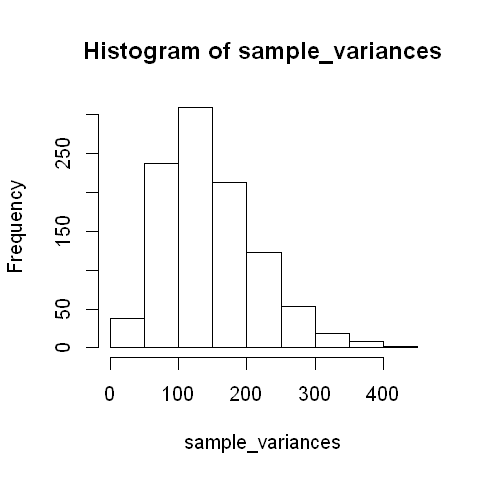

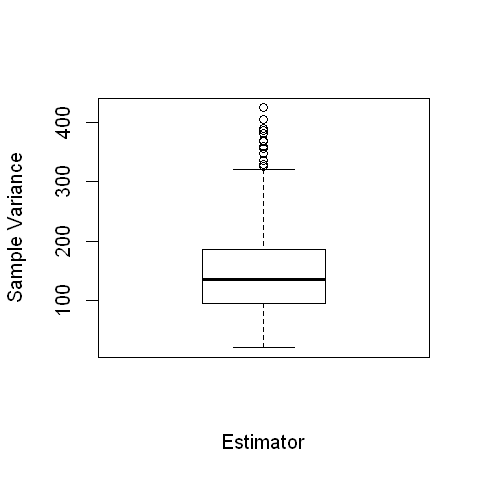

In [8]:
hist(sample_variances)
boxplot(sample_variances, xlab = "Estimator", ylab = "Sample Variance")